In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle, json, os 

In [74]:
import shutil

In [56]:
data_file = './data/'

In [76]:
img_folder = './data/MAMe_data_256/data_256/'

In [11]:
data_folder = 'data/MAMe_metadata/'
data_csv = data_folder + 'MAMe_dataset.csv' 
label_csv = data_folder + 'MAMe_labels.csv'

In [12]:
data_df = pd.read_csv(data_csv) 

In [14]:
data_df.head(20) 

,Image file,Medium,Museum,Museum-based instance ID,Subset,Width,Height,Product size,Aspect ratio
0,436018.jpg,Oil on canvas,Metropolitan Museum of Art,29.100.60,train,3144.0,3840.0,12072960.0,0.8187
1,11779.jpg,Oil on canvas,Metropolitan Museum of Art,1982.373,train,1707.0,2136.0,3646152.0,0.7992
2,19022.jpg,Oil on canvas,Metropolitan Museum of Art,2006.418,train,2845.0,3811.0,10842295.0,0.7465
3,435883.jpg,Oil on canvas,Metropolitan Museum of Art,61.101.3,train,3811.0,2916.0,11112876.0,1.3069
4,10481.jpg,Oil on canvas,Metropolitan Museum of Art,09.95,train,3811.0,2099.0,7999289.0,1.8156
5,13345.jpg,Oil on canvas,Metropolitan Museum of Art,84.12a,train,2655.0,3722.0,9881910.0,0.7133
6,10215.jpg,Oil on canvas,Metropolitan Museum of Art,08.237.3,train,2421.0,1146.0,2774466.0,2.1126
7,437974.jpg,Oil on canvas,Metropolitan Museum of Art,1996.285,train,3080.0,3722.0,11463760.0,0.8275
8,11974.jpg,Oil on canvas,Metropolitan Museum of Art,1988.353,train,3803.0,3175.0,12074525.0,1.1978
9,436876.jpg,Oil on canvas,Metropolitan Museum of Art,25.110.46,train,1245.0,1773.0,2207385.0,0.7022


In [15]:
data_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37407 entries, 0 to 37406
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Image file                37407 non-null  object 
 1   Medium                    37407 non-null  object 
 2   Museum                    37407 non-null  object 
 3   Museum-based instance ID  37407 non-null  object 
 4   Subset                    37407 non-null  object 
 5   Width                     37407 non-null  float64
 6   Height                    37407 non-null  float64
 7   Product size              37407 non-null  float64
 8   Aspect ratio              37407 non-null  float64
dtypes: float64(4), object(5)
memory usage: 2.6+ MB


In [16]:
data_df.describe() 

,Width,Height,Product size,Aspect ratio
count,37407.000000,37407.000000,3.740700e+04,37407.000000
mean,2841.856711,2995.828936,1.032388e+07,1.028169
std,1573.004179,1601.247010,1.231509e+07,0.478613
min,224.000000,235.000000,2.502400e+05,0.112300
25%,1824.000000,1918.500000,3.408000e+06,0.704100
50%,2667.000000,2900.000000,8.104191e+06,0.910500
75%,3773.000000,3842.000000,1.209547e+07,1.303550
max,32683.000000,23577.000000,3.729784e+08,15.001900


In [65]:
cols = data_df.columns 
cols

Index(['Image file', 'Medium', 'Museum', 'Museum-based instance ID', 'Subset',
       'Width', 'Height', 'Product size', 'Aspect ratio'],
      dtype='object')

In [27]:
subsets =  data_df['Subset']. unique().tolist() 

In [33]:
subsets

['train', 'val', 'test']

In [36]:
for subset in subsets:
    subset_df = data_df[data_df['Subset'] == subset] 
    print('{} {} examples in MAME dataset'.format(len(subset_df), subset))    

20300 train examples in MAME dataset
1450 val examples in MAME dataset
15657 test examples in MAME dataset


In [61]:
classes = sorted(data_df['Medium'].unique())

In [62]:
num_classes = len(classes) 
num_classes

29

In [63]:
cls_folder_dict = {'train': dict(), 'val': dict(), 'test': dict()}

In [64]:
for subset in subsets:
    subset_folder = data_file + subset
    if not os.path.exists(subset_folder):
        os.mkdir(subset_folder)
    for cls in classes:
        cls_folder = subset_folder + '/' + cls + '/'
        cls_folder_dict[subset][cls] = cls_folder
        if not os.path.exists(cls_folder):
            os.mkdir(cls_folder)

In [78]:
new_img_paths = []

In [67]:
image_files = data_df[cols[0]].values
image_subsets = data_df[cols[4]].values
image_cls = data_df[cols[1]].values 

In [95]:
for path, subset, cls in zip(image_files, image_subsets, image_cls):
    
    org_img_path = img_folder + path 
    img_path = cls_folder_dict[subset][cls] + path 
    new_img_paths.append(img_path)
    shutil.copyfile(org_img_path, img_path)

In [80]:
len(new_img_paths)

37407

In [84]:
data_df['Organized_img_path'] = new_img_paths

In [86]:
data_df.head(5)

,Image file,Medium,Museum,Museum-based instance ID,Subset,Width,Height,Product size,Aspect ratio,organized_img_path,Organized_img_path
0,436018.jpg,Oil on canvas,Metropolitan Museum of Art,29.100.60,train,3144.0,3840.0,12072960.0,0.8187,./data/train/Oil on canvas/436018.jpg,./data/train/Oil on canvas/436018.jpg
1,11779.jpg,Oil on canvas,Metropolitan Museum of Art,1982.373,train,1707.0,2136.0,3646152.0,0.7992,./data/train/Oil on canvas/11779.jpg,./data/train/Oil on canvas/11779.jpg
2,19022.jpg,Oil on canvas,Metropolitan Museum of Art,2006.418,train,2845.0,3811.0,10842295.0,0.7465,./data/train/Oil on canvas/19022.jpg,./data/train/Oil on canvas/19022.jpg
3,435883.jpg,Oil on canvas,Metropolitan Museum of Art,61.101.3,train,3811.0,2916.0,11112876.0,1.3069,./data/train/Oil on canvas/435883.jpg,./data/train/Oil on canvas/435883.jpg
4,10481.jpg,Oil on canvas,Metropolitan Museum of Art,09.95,train,3811.0,2099.0,7999289.0,1.8156,./data/train/Oil on canvas/10481.jpg,./data/train/Oil on canvas/10481.jpg


In [89]:
data_df.head()

,Image file,Medium,Museum,Museum-based instance ID,Subset,Width,Height,Product size,Aspect ratio,organized_img_path,Organized_img_path
0,436018.jpg,Oil on canvas,Metropolitan Museum of Art,29.100.60,train,3144.0,3840.0,12072960.0,0.8187,./data/train/Oil on canvas/436018.jpg,./data/train/Oil on canvas/436018.jpg
1,11779.jpg,Oil on canvas,Metropolitan Museum of Art,1982.373,train,1707.0,2136.0,3646152.0,0.7992,./data/train/Oil on canvas/11779.jpg,./data/train/Oil on canvas/11779.jpg
2,19022.jpg,Oil on canvas,Metropolitan Museum of Art,2006.418,train,2845.0,3811.0,10842295.0,0.7465,./data/train/Oil on canvas/19022.jpg,./data/train/Oil on canvas/19022.jpg
3,435883.jpg,Oil on canvas,Metropolitan Museum of Art,61.101.3,train,3811.0,2916.0,11112876.0,1.3069,./data/train/Oil on canvas/435883.jpg,./data/train/Oil on canvas/435883.jpg
4,10481.jpg,Oil on canvas,Metropolitan Museum of Art,09.95,train,3811.0,2099.0,7999289.0,1.8156,./data/train/Oil on canvas/10481.jpg,./data/train/Oil on canvas/10481.jpg


In [93]:
data_df = data_df.drop('organized_img_path', axis=1) 

In [94]:
data_df.to_csv('Organized_MAMe_dataset.csv')

In [49]:
def plot_data(classes, len_col):
    
    
    len_row = classes // len_col + int((classes // len_col) != 0) 
    for  cls in classes:
        row_idx = classes.index(cls) // len_col 
        col_idx = classes.index(cls) % len_col 
        
        
        
        
    print(len_row) 

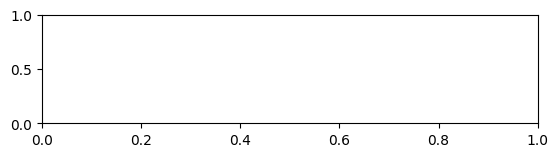

In [53]:
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan = 3, rowspan = 1) 

In [54]:
for c in classes:
    # Get a random sample of an instance with class c
    filename = img_df[img_df['class']==c].sample(1)['filename'].values[0]
        
    # Plot image
    plt.subplot(6, 5, i)
    plt.imshow(load_img(filename))
    plt.title(c, fontsize=16)
    plt.axis('off')
    i += 1
                  
    plt.show()


NameError: name 'img_df' is not defined

In [50]:
plot_data(29, 5) 

6


In [52]:
4 // 6

0

In [ ]:
def load_mame(dataframe=False):
    """ Load MAMe dataset data
    Args:
      dataframe (bool): whether to return a dataframe or an array of 
                        filenames and a list of labels
      
    Returns:
      (x_train, y_train), (x_val, y_val), (x_test, y_test) if dataframe=False
      or
      df_train, df_val, df_test if dataframe=True
    """
    INPUT_PATH = '/kaggle/input/'

    # Load dataset table
    dataset = pd.read_csv(os.path.join(INPUT_PATH, 'mame-dataset', 'MAMe_dataset.csv'))
    
    # Subset divisions
    x_train_files = dataset.loc[dataset['Subset'] == 'train']['Image file'].tolist()
    y_train_class = dataset.loc[dataset['Subset'] == 'train']['Medium'].tolist()

    x_val_files = dataset.loc[dataset['Subset'] == 'val']['Image file'].tolist()
    y_val_class = dataset.loc[dataset['Subset'] == 'val']['Medium'].tolist()

    x_test_files = dataset.loc[dataset['Subset'] == 'test']['Image file'].tolist()
    y_test_class = dataset.loc[dataset['Subset'] == 'test']['Medium'].tolist()

    if dataframe:
        train = pd.DataFrame({'filename': x_train_files, 'class': y_train_class})
        val = pd.DataFrame({'filename': x_val_files, 'class': y_val_class})
        test = pd.DataFrame({'filename': x_test_files, 'class': y_test_class})
        
        # Set full path
        train['filename'] = train['filename'].transform(lambda x: INPUT_PATH + 'mame-dataset' + os.sep + 'data' + os.sep + x)
        val['filename'] = val['filename'].transform(lambda x: INPUT_PATH + 'mame-dataset' + os.sep + 'data' + os.sep + x)
        test['filename'] = test['filename'].transform(lambda x: INPUT_PATH + 'mame-dataset' + os.sep + 'data' + os.sep + x)
        
        return train, val, test
    
    else:
        # Return list of filenames
        x_train = [os.path.join(INPUT_PATH, 'mame-dataset', 'data', img_name) for img_name in x_train_files]
        x_val = [os.path.join(INPUT_PATH, 'mame-dataset', 'data', img_name) for img_name in x_val_files]
        x_test = [os.path.join(INPUT_PATH, 'mame-dataset', 'data', img_name) for img_name in x_test_files]

        return (np.array(x_train), np.array(y_train_class)), (np.array(x_val), 
              np.array(y_val_class)), (np.array(x_test), np.array(y_test_class))
    

df_train, df_val, df_test = load_mame(dataframe=True)
print(df_train.head())

In [8]:
os.getcwd()

'D:\\UPC_Course3\\DL\\dl_project1'

In [ ]:
data_df = pd.read_csv()